In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt

In [2]:
df2 = pd.read_csv("../../target/mv_gaussian_noise.csv")

In [3]:
points2 = df2[df2["class"]=="A"]
noise2 = df2[df2["class"]=="B"]

In [9]:
def estimate_kde_bw(data):
    q3 = np.percentile(data, 75, axis=0)
    q1 = np.percentile(data, 25, axis=0)
    iqr = q3 - q1
    bw = iqr * (data.shape[0])**(-1.0/(data.shape[1]+4))
    return bw

In [16]:
bw = estimate_kde_bw(df2[["m1","m2"]])
data = df2[["m1","m2"]].values

In [20]:
bw

array([ 0.38611456,  0.38583412])

In [22]:
from sklearn.neighbors import (
    KernelDensity,
    KDTree,
)

In [23]:
tol = .1
kde = KernelDensity(
    bandwidth=.38,
    kernel='gaussian',
    algorithm='kd_tree',
    rtol=tol,
)
kde.fit(data)

KernelDensity(algorithm='kd_tree', atol=0, bandwidth=0.38, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0.1)

In [25]:
x = np.arange(-5,25,.5)
y = np.arange(-5,25,.5)
X,Y = np.meshgrid(x,y,indexing="ij")
Z = np.zeros((len(x),len(y)))
for i in range(len(x)):
    for j in range(len(y)):
        Z[i,j]=kde.score_samples([[X[i,j],Y[i,j]]])[0]

0,0
0,1
0,2
0,3
0,4
0,5
0,6
0,7
0,8
0,9
0,10
0,11
0,12
0,13
0,14
0,15
0,16
0,17
0,18
0,19
0,20
0,21
0,22
0,23
0,24
0,25
0,26
0,27
0,28
0,29
0,30
0,31
0,32
0,33
0,34
0,35
0,36
0,37
0,38
0,39
0,40
0,41
0,42
0,43
0,44
0,45
0,46
0,47
0,48
0,49
0,50
0,51
0,52
0,53
0,54
0,55
0,56
0,57
0,58
0,59
1,0
1,1
1,2
1,3
1,4
1,5
1,6
1,7
1,8
1,9
1,10
1,11
1,12
1,13
1,14
1,15
1,16
1,17
1,18
1,19
1,20
1,21
1,22
1,23
1,24
1,25
1,26
1,27
1,28
1,29
1,30
1,31
1,32
1,33
1,34
1,35
1,36
1,37
1,38
1,39
1,40
1,41
1,42
1,43
1,44
1,45
1,46
1,47
1,48
1,49
1,50
1,51
1,52
1,53
1,54
1,55
1,56
1,57
1,58
1,59
2,0
2,1
2,2
2,3
2,4
2,5
2,6
2,7
2,8
2,9
2,10
2,11
2,12
2,13
2,14
2,15
2,16
2,17
2,18
2,19
2,20
2,21
2,22
2,23
2,24
2,25
2,26
2,27
2,28
2,29
2,30
2,31
2,32
2,33
2,34
2,35
2,36
2,37
2,38
2,39
2,40
2,41
2,42
2,43
2,44
2,45
2,46
2,47
2,48
2,49
2,50
2,51
2,52
2,53
2,54
2,55
2,56
2,57
2,58
2,59
3,0
3,1
3,2
3,3
3,4
3,5
3,6
3,7
3,8
3,9
3,10
3,11
3,12
3,13
3,14
3,15
3,16
3,17
3,18
3,19
3,20
3,21
3,22
3,23
3,24
3,25
3,26
3,27


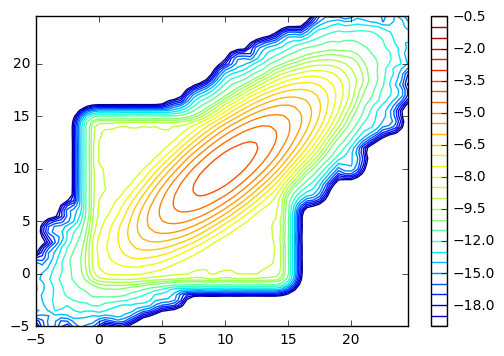

In [36]:
plt.figure()
plt.contour(X,Y,Z, levels=np.hstack([np.arange(-20,-10,1),np.arange(-10, 0, .5)]))
plt.colorbar()

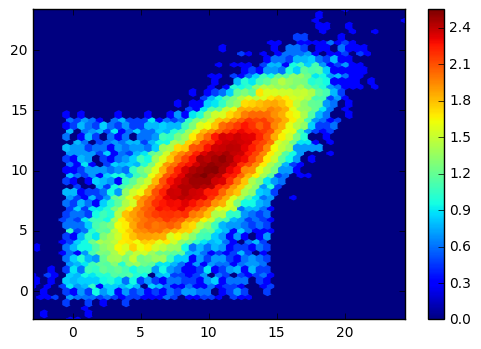

In [41]:
plt.figure()
plt.hexbin(data[:50000,0], data[:50000,1], gridsize=50, bins="log")
plt.scatter(noise2[:])
plt.colorbar()

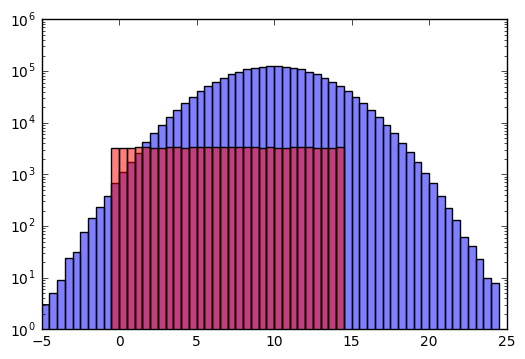

In [58]:
plt.figure()
plt.hist(points2["m1"].values, bins=np.arange(-5,25,.5), fc=(0, 0, 1, 0.5))
plt.hist(noise2["m1"].values, bins=np.arange(-5,25,.5), fc=(1, 0, 0, 0.5))
plt.yscale('log', nonposy='clip')